Importing needed libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats

For Co-relation Analysis
Collect historical data for NASDAQ and NSE indices.
=> I am taking last 1 year data of DJI, NASDAQ from NASDAQ and NIFTY, BANKNIFTY from NSE
=> Number of holidays was diffrent in both market to make them compareable, I have taken last 248 days only

In [ ]:
data_dji = pd.read_csv("DJI.csv").iloc[-248:]
data_nifty = pd.read_csv("Nifty.csv").iloc[-248:]
data_nasdaq = pd.read_csv("NASDAQ.csv").iloc[-248:]
data_nifty_bank = pd.read_csv("Nifty_Bank.csv").iloc[-248:]

To find the corelation coefficient I am using corrcoef funtion of numpy
and printing them as follows

In [ ]:
co_rel_dji_nifty = np.corrcoef(data_dji['Close'], data_nifty['Close'])[0, 1]
co_rel_dji_nifty_bank = np.corrcoef(data_dji['Close'], data_nifty_bank['Close'])[0, 1]
co_rel_nasdaq_nifty = np.corrcoef(data_nasdaq['Close'], data_nifty['Close'])[0, 1]
co_rel_nasdaq_nifty_bank = np.corrcoef(data_nasdaq['Close'], data_nifty_bank['Close'])[0, 1]

print("Co-relation coefficients for last 248Days:--\n")
print("Nifty & DJI = ", f"{co_rel_dji_nifty:.3f}")
print("Nifty & NASDAQ = ", f"{co_rel_nasdaq_nifty:.3f}")
print("Bank Nifty & DJI = ", f"{co_rel_dji_nifty_bank:.3f}")
print("Bank Nifty & NASDAQ = ", f"{co_rel_nasdaq_nifty_bank:.3f}")

Co-relation coefficients for last 248Days:--

Nifty & DJI =  0.588
Nifty & NASDAQ =  0.032
Bank Nifty & DJI =  0.578
Bank Nifty & NASDAQ =  0.005


Result: NIFTY and DJI seems to be most related market in last year
        BANKNIFTY and DJI also lies in same range as NIFTY and DJI
        both pairs had above 57% relation in same direction

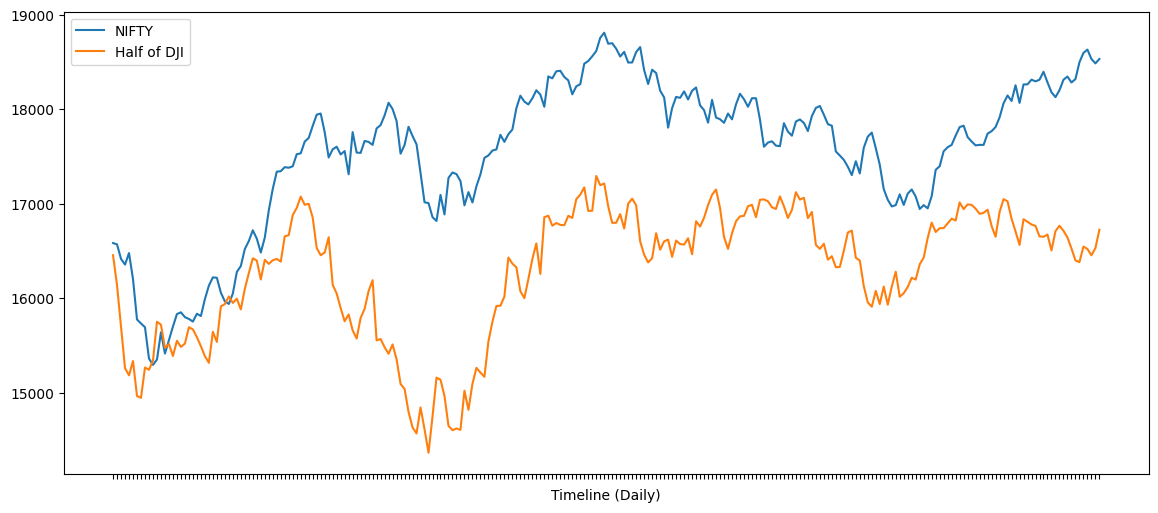

In [ ]:
dates = data_nifty['Date']

plt.figure(figsize=(14,6))
plt.plot(dates, data_nifty["Close"], label="NIFTY")
plt.plot(dates, 0.50*data_dji["Close"], label="Half of DJI")
plt.xlabel('Timeline (Daily)')
plt.legend(loc='best')
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])

plt.show()

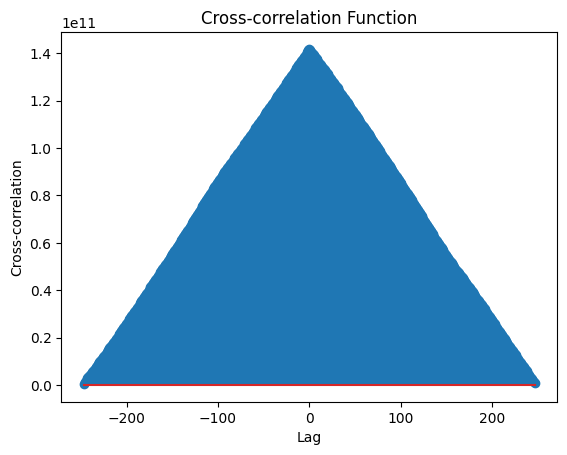

Average lead or lag period: 0.0


In [ ]:
cross_correlation = np.correlate(data_nifty['Close'], data_dji['Close'], mode='full')
max_correlation_lag = np.argmax(cross_correlation) - (len(data_nifty) - 1)
average_period = max_correlation_lag / len(data_nifty)

lags = np.arange(-len(data_nifty) + 1, len(data_nifty))
plt.stem(lags, cross_correlation)
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation Function')
plt.show()

print(f"Average lead or lag period: {average_period}")

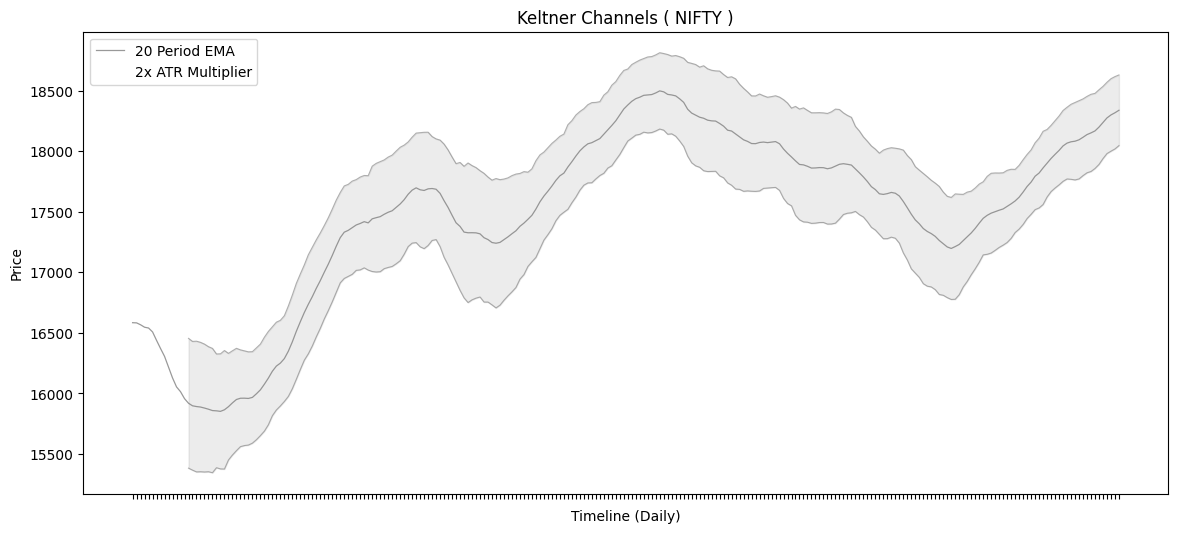

In [ ]:
def calculate_ema(dataframe):
    ema = dataframe['Close'].ewm(span=20, adjust=False).mean()
    return ema

def calculate_atr(data):
    # Calculate the True Range (TR)
    data['HL'] = data['High'] - data['Low']
    data['HC'] = abs(data['High'] - data['Close'].shift(1))
    data['LC'] = abs(data['Low'] - data['Close'].shift(1))
    data['TR'] = data[['HL', 'HC', 'LC']].max(axis=1)

    # Calculate the Average True Range (ATR)
    # I choose 15 period
    data['ATR'] = data['TR'].rolling(15).mean()

    return data['ATR']

data = data_nifty

date = data['Date']
ema = calculate_ema(data)
atr = calculate_atr(data)

plt.figure(figsize=(14,6))
plt.plot(date, ema, color='grey', linewidth=0.9, alpha=0.8, label='20 Period EMA')
plt.plot(date, ema-(2*atr), color='grey', linewidth=0.8, alpha=0.6)
plt.plot(date, ema+(2*atr), color='grey', linewidth=0.8, alpha=0.6)
plt.fill_between(date, ema-(2*atr), ema+(2*atr), color='grey', alpha=0.15)

plt.title('Keltner Channels ( NIFTY )')
plt.ylabel('Price')
plt.xlabel('Timeline (Daily)')
plt.plot([], [], ' ', label='2x ATR Multiplier')
plt.legend(loc='best')

ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])

plt.show()

b. Bollinger Bands

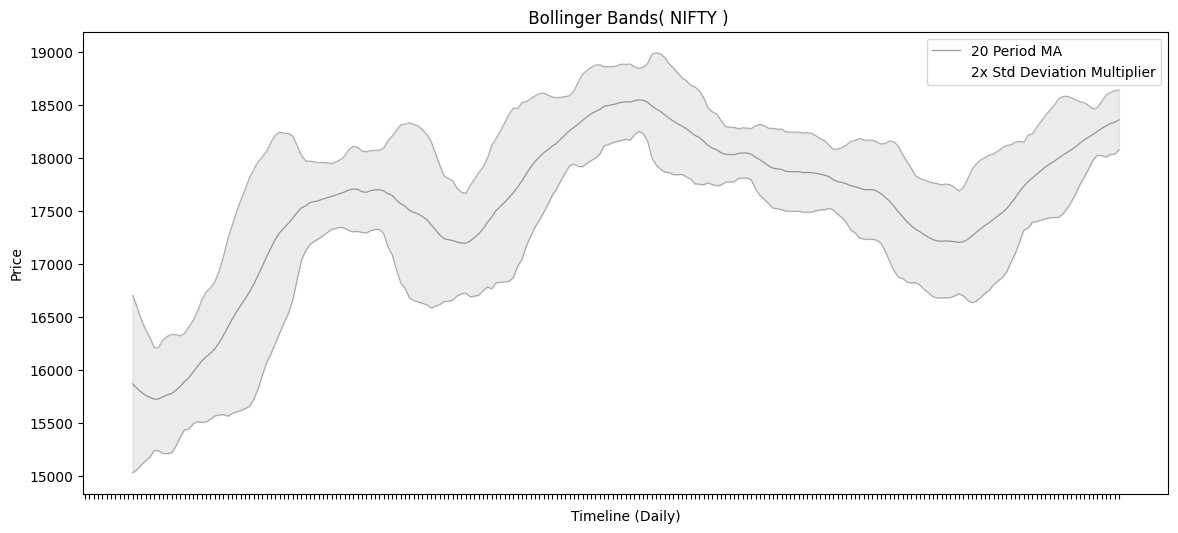

In [ ]:
def calculate_bollinger_bands(data):
    rolling_mean = data['Close'].rolling(window=20).mean()
    rolling_std = data['Close'].rolling(window=20).std()

    upper_band = rolling_mean + (rolling_std * 2)
    lower_band = rolling_mean - (rolling_std * 2)

    return rolling_mean, upper_band, lower_band

data = data_nifty
rolling_mean, upper_band, lower_band = calculate_bollinger_bands(data)

plt.figure(figsize=(14,6))
plt.plot(date, rolling_mean, color='grey', linewidth=0.9, alpha=0.8, label='20 Period MA')
plt.plot(date, upper_band, color='grey', linewidth=0.8, alpha=0.6)
plt.plot(date, lower_band, color='grey', linewidth=0.8, alpha=0.6)
plt.fill_between(date, lower_band, upper_band, color='grey', alpha=0.15)

plt.title(' Bollinger Bands( NIFTY )')
plt.ylabel('Price')
plt.xlabel('Timeline (Daily)')
plt.plot([], [], ' ', label='2x Std Deviation Multiplier')
plt.legend(loc='best')

ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])

plt.show()

c. MACD Indicator

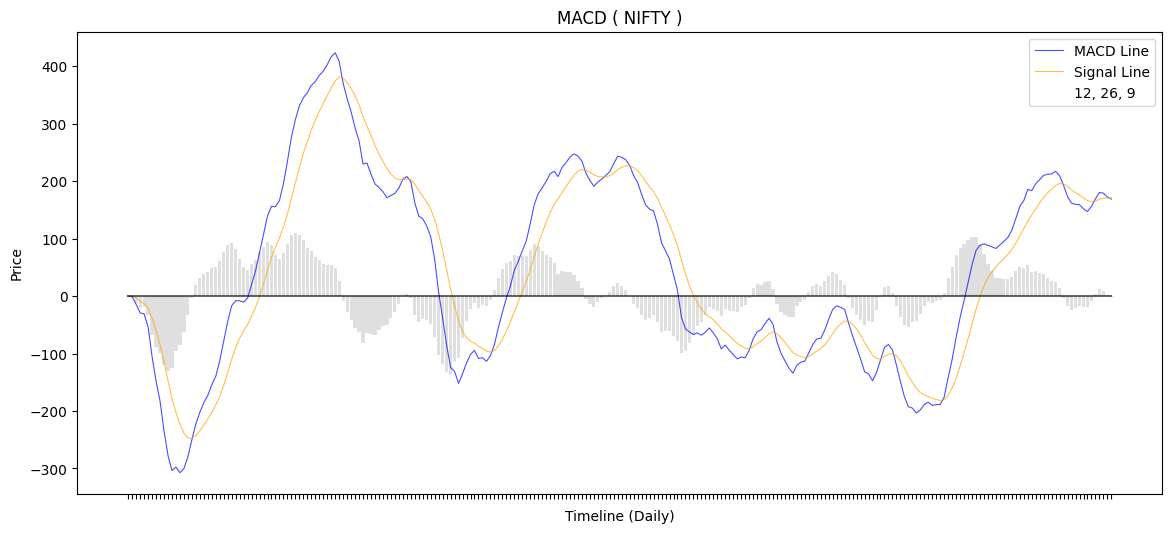

In [ ]:
def calculate_macd(data, short_period, long_period, signal_period):
    short_ema = data['Close'].ewm(span=short_period, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_period, adjust=False).mean()
    
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_period, adjust=False).mean()
    macd_histogram = macd_line - signal_line
    
    return macd_line, signal_line, macd_histogram

data = data_nifty

macd_line, signal_line, macd_histogram = calculate_macd(data, 12, 26, 9)

plt.figure(figsize=(14,6))
plt.plot(date, macd_line, label='MACD Line', color='blue', alpha=0.7, linewidth=0.8)
plt.plot(date, signal_line, label='Signal Line', color='orange', alpha=0.7, linewidth=0.8)
zeros = np.zeros(len(data))
plt.plot(date, zeros, color='black', alpha=0.6)
plt.bar(date, macd_histogram, color='grey', alpha=0.25)

plt.title('MACD ( NIFTY )')
plt.ylabel('Price')
plt.xlabel('Timeline (Daily)')
plt.plot([], [], ' ', label='12, 26, 9')
plt.legend(loc='best')

ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])

plt.show()

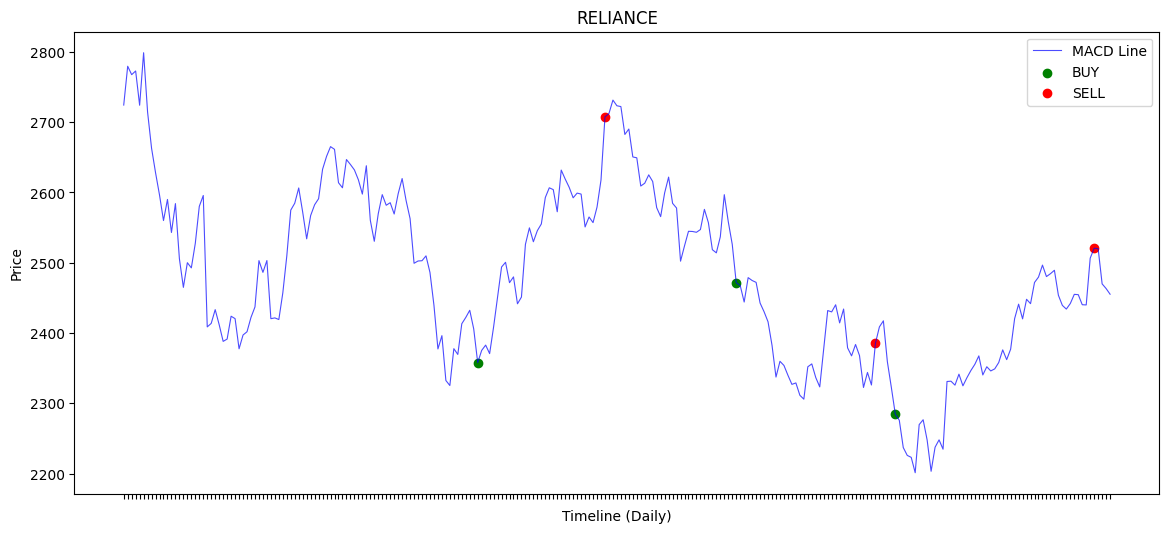

In [ ]:
data = pd.read_csv('BRITANNIA.csv.csv')
date = data['Date']
ema = calculate_ema(data)
atr = calculate_atr(data)
rolling_mean, upper_band, lower_band = calculate_bollinger_bands(data)
macd_line, signal_line, macd_histogram = calculate_macd(data, 12, 26, 9)

def detect_crossover(data, a, b):
    ma_l = data['Close'].rolling(window=26).mean()
    ma_s = data['Close'].rolling(window=12).mean()

    p_cross = []
    n_cross = []
    p_cross.append(None)
    n_cross.append(None)

    for i in range(1, len(a)):
        if (a[i-1] < b[i-1]) and (a[i] >= b[i]):
            if(ma_l[i] > ma_s[i]):
                p_cross.append(data['Close'][i])
            else:
                p_cross.append(None)
            n_cross.append(None)
        elif (a[i-1] > b[i-1]) and (a[i] <= b[i]):
            p_cross.append(None)
            if(ma_l[i] < ma_s[i]):
                n_cross.append(data['Close'][i])
            else:
                n_cross.append(None)
        else :
            p_cross.append(None)
            n_cross.append(None)

    return p_cross, n_cross

macd_pc, macd_nc = detect_crossover(data, signal_line, macd_line)


plt.figure(figsize=(14,6))
plt.plot(date, data['Close'], label='MACD Line', color='blue', alpha=0.7, linewidth=0.8)

plt.title('BRITANNIA.csv')
plt.ylabel('Price')
plt.xlabel('Timeline (Daily)')

plt.scatter(date, macd_pc, color='green', label='BUY')
plt.scatter(date, macd_nc, color='red', label='SELL')
plt.legend(loc='best')

ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])

plt.show()

Letssgo with more statistics.
Now we calculate net profit/loss if we follow this strategy during the period

In [ ]:
buysell = {'Buy Date':[], 'Buy Price':[], 'Sell Date':[], 'Sell Price':[]}
for i in range(0, len(date)):
    if(macd_pc[i] != None):
        buysell['Buy Date'].append(date[i])
        buysell['Buy Price'].append(macd_pc[i])    
    if(macd_nc[i] != None):
        buysell['Sell Date'].append(date[i])
        buysell['Sell Price'].append(macd_nc[i])    

buysell = pd.DataFrame(buysell)
sell = buysell['Sell Price']
buy = buysell['Buy Price']
netpl = sell-buy
buysell['Net P/L'] = netpl
print(buysell)
cumm_return = sum(netpl)
print('\nCummulative Return = ', '{:.3f}'.format(cumm_return))
print('Sharpe Ratio = ', '{:.3f}'.format(stats.mean(netpl)/stats.stdev(netpl)))

     Buy Date    Buy Price   Sell Date   Sell Price     Net P/L
0  2022-10-11  2357.899902  2022-11-28  2707.550049  349.650146
1  2023-01-12  2471.600098  2023-03-03  2385.399902  -86.200195
2  2023-03-13  2284.500000  2023-05-29  2520.600098  236.100098

Cummulative Return =  499.550
Sharpe Ratio =  0.736
